In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from engine import Value
a = Value(2.0)
a

Value(data = 2.0)

In [5]:
a = Value(2.0)
b = Value(-3.0)
a + b

Value(data = -1.0)

In [6]:
a = Value(2.0)
b = Value(-3.0)
a * b

Value(data = -6.0)

In [7]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
a * b + c

Value(data = 4.0)

In [8]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a * b + c
d

Value(data = 4.0)

In [9]:
d._prev

{Value(data = -6.0), Value(data = 10.0)}

In [10]:
d._op

'+'

In [16]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f }" % (n.data, ), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

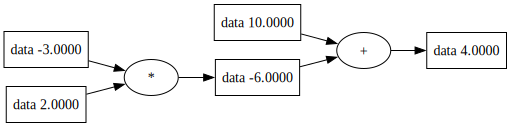

In [18]:
draw_dot(d)